# Analyzing Time Series Data

## 1. Importing the Libraries and Data
## 2. Dataset 1: "Total Separations: Education Services"
      2A. Subsetting, wrangling, and cleaning time-series data
      2B. Time series analysis: decomposition
      2C. Testing for stationarity

## 3. Dataset 2: "Hires: Education and Health Services"
      3A. Subsetting, wrangling, and cleaning time-series data
      3B. Time series analysis: decomposition
      3C. Testing for stationarity
      3D. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = 'ehLB1PjPcq6q3ird4M89'

### 2. Dataset 1: "Total Separations: Education Services"

In [3]:
# Importing the Federal Reserve Economic Data for "Total Separations: Education Services"   

data = quandl.get('FRED/JTU6100TSR')


In [4]:
data.head(5)

,Value
Date,
2000-12-01,1.2
2001-01-01,2.5
2001-02-01,1.0
2001-03-01,1.6
2001-04-01,2.2


In [5]:
data.shape

(251, 1)

In [6]:
type(data)

pandas.core.frame.DataFrame

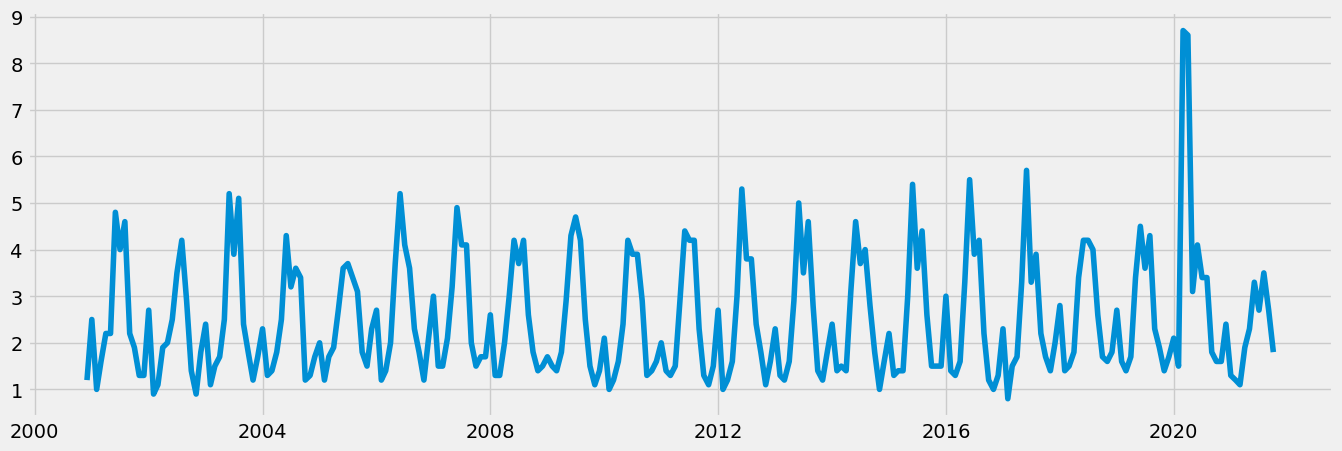

In [7]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

###  2A. Subsetting, wrangling, and cleaning time-series data

Need to get the moving average for the values first and then I'll start cleaning up the set:

In [8]:
# Creating a new column to keep the "moving average" values
data['MA_value'] = data.rolling(window=12).mean()

In [9]:
data.head(30) # this leaves the first 12 rows of the "MA_value" Null

,Value,MA_value
Date,,
2000-12-01,1.2,NaN
2001-01-01,2.5,NaN
2001-02-01,1.0,NaN
2001-03-01,1.6,NaN
2001-04-01,2.2,NaN
2001-05-01,2.2,NaN
2001-06-01,4.8,NaN
2001-07-01,4.0,NaN
2001-08-01,4.6,NaN


In [10]:
# Reset index so that to use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
data_2.head(15)

,Date,Value,MA_value
0,2000-12-01,1.2,NaN
1,2001-01-01,2.5,NaN
2,2001-02-01,1.0,NaN
3,2001-03-01,1.6,NaN
4,2001-04-01,2.2,NaN
5,2001-05-01,2.2,NaN
6,2001-06-01,4.8,NaN
7,2001-07-01,4.0,NaN
8,2001-08-01,4.6,NaN
9,2001-09-01,2.2,NaN


In [12]:
# filtering the first 12 rows and the last year (2020) due to all the pandemic-related fluctuations
data_sub = data_2.loc[(data_2['Date'] > '2001-12-01') & (data_2['Date'] < '2020-01-01')]

In [13]:
data_sub.shape

(216, 3)

In [14]:
# I already created the "Moving Average" and saved it in the MA_value column, so no need for the "Value" column anymore:
data_sub = data_sub.drop(columns = "Value")



This is great! Now I have the ANNUAL moving average for the years 2001 - 2019

In [15]:
data_sub

,Date,MA_value
13,2002-01-01,2.483333
14,2002-02-01,2.475000
15,2002-03-01,2.433333
16,2002-04-01,2.408333
17,2002-05-01,2.391667
...,...,...
224,2019-08-01,2.575000
225,2019-09-01,2.550000
226,2019-10-01,2.566667
227,2019-11-01,2.550000


In [16]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,MA_value
datetime,
2002-01-01,2.483333
2002-02-01,2.475000
2002-03-01,2.433333
2002-04-01,2.408333
2002-05-01,2.391667


In [17]:
data_sub.shape

(216, 1)

In [18]:
data_sub.head(100)

,MA_value
datetime,
2002-01-01,2.483333
2002-02-01,2.475000
2002-03-01,2.433333
2002-04-01,2.408333
2002-05-01,2.391667
...,...
2009-12-01,2.416667
2010-01-01,2.450000
2010-02-01,2.408333


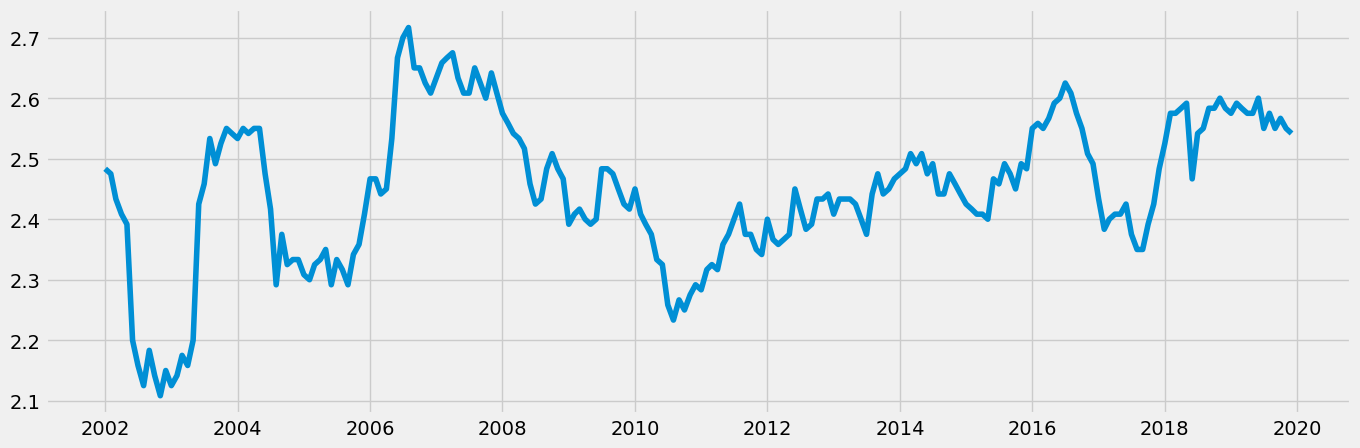

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [20]:
# Check for missing values 

data_sub.isnull().sum() # no null values

MA_value    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()



133

###  2B. Time series analysis: decomposition

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

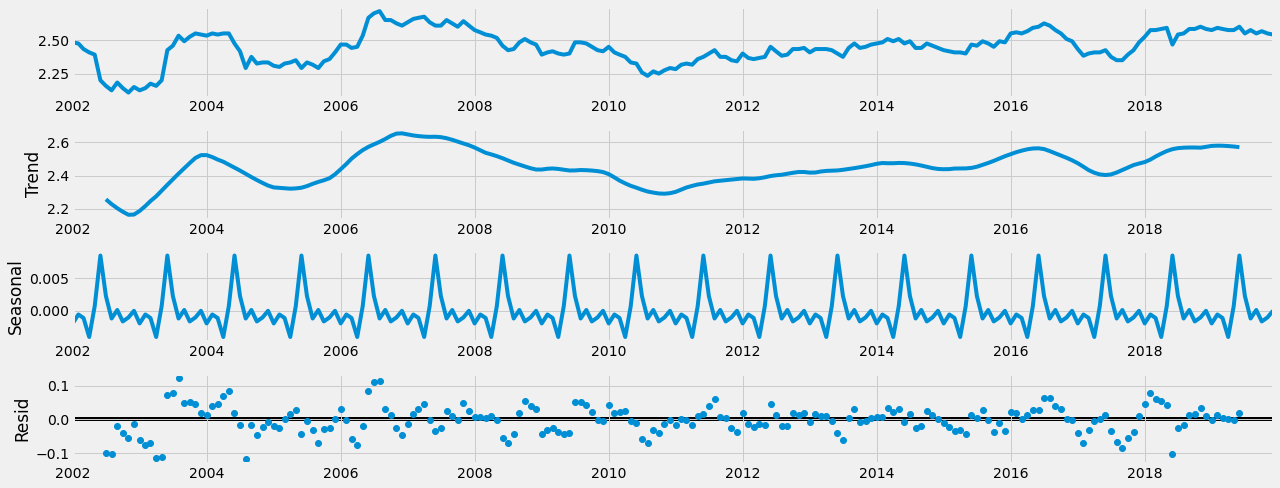

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

### 2C. Testing for stationarity

In [25]:
# Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['MA_value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.892575
p-value                          0.046218
Number of Lags Used             13.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64





| Test Statistic        | -2.892575   |
|-----------------------|-------------|
|  Critical Value (5%)  | -2.875957   |


Well, comparing the Test Statistic and Critical value (5%) shows that the Test Statistics, -2.892575,  is slightly smaller than the Critical Value (5%), -2.875957. This means that we can actually reject the null hypothesis and that there data is stationary! 


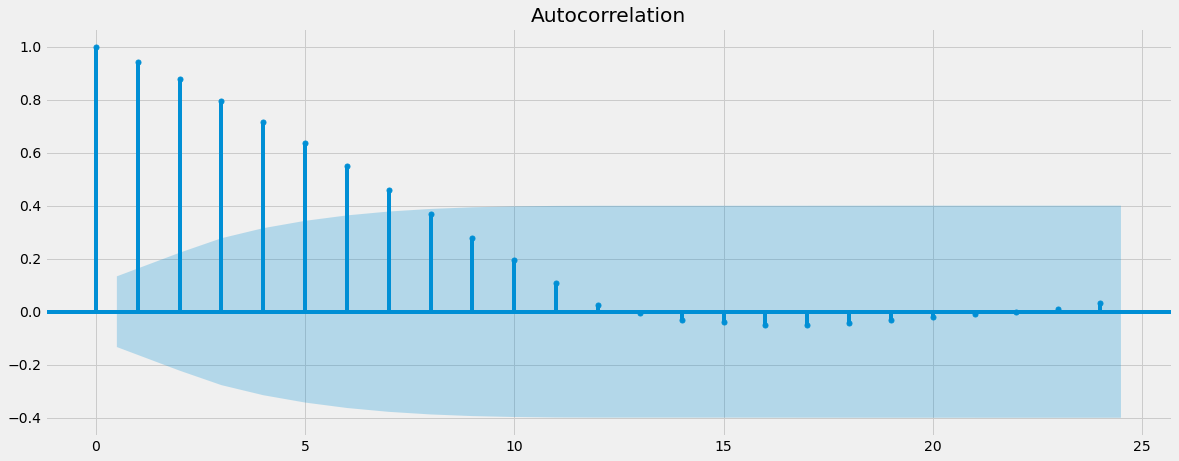

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

There are some lines above the blue edge of the confidence interval but most of the lines are within. This means there are only a few autocorrelated data and the set is probably stationary This supports the results from the Dickey-Fuller test conducted before. 

As a result, there is no need to stationarize this dataset. 

### 3. Dataset 2: "Hires: Education and Health Services"

In [27]:
# Importing the Federal Reserve Economic Data for "Hires: Education and Health Services"   

data2 = quandl.get('FRED/JTU6000HIL')



In [28]:
data2.head(5)

,Value
Date,
2000-12-01,371.0
2001-01-01,550.0
2001-02-01,455.0
2001-03-01,502.0
2001-04-01,489.0


In [29]:
data2.shape

(251, 1)

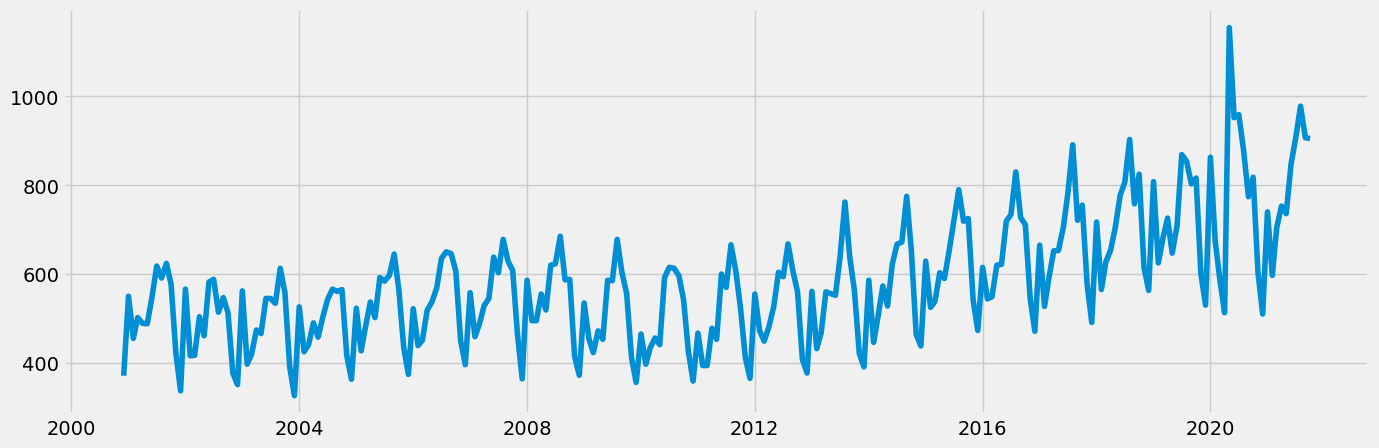

In [30]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data2)

The data is reported monthly which explains why there are so many fluctuations. So I am going to use moving average again and replot this set.

### 3A. Subsetting, wrangling, and cleaning time-series data

In [31]:
# Creating a new column to keep the annual "moving average" values
data2['MA_value'] = data2.rolling(window=12).mean()

In [32]:
data2.head(20)

,Value,MA_value
Date,,
2000-12-01,371.0,NaN
2001-01-01,550.0,NaN
2001-02-01,455.0,NaN
2001-03-01,502.0,NaN
2001-04-01,489.0,NaN
2001-05-01,488.0,NaN
2001-06-01,549.0,NaN
2001-07-01,618.0,NaN
2001-08-01,591.0,NaN


In [33]:
data2.tail(25)

,Value,MA_value
Date,,
2019-10-01,816.0,726.083333
2019-11-01,600.0,724.833333
2019-12-01,530.0,722.083333
2020-01-01,863.0,726.666667
2020-02-01,673.0,730.666667
2020-03-01,589.0,723.250000
2020-04-01,513.0,705.500000
2020-05-01,1155.0,747.833333
2020-06-01,952.0,768.083333


In [34]:
# Reset index so that to use the "Date" column as a filter

data2_2 = data2.reset_index()

In [35]:
# filtering the first 12 rows and the last year (2020) due to all the pandemic-related fluctuations
data2_sub = data2_2.loc[(data2_2['Date'] >= '2001-12-01') & (data2_2['Date'] < '2020-01-01')]

In [36]:
data2_sub.shape

(217, 3)

In [37]:
# I already created the "Moving Average" and saved it in the MA_value column, so no need for the "Value" column anymore:
data2_sub = data2_sub.drop(columns = "Value")



In [38]:
data2_sub

,Date,MA_value
12,2001-12-01,516.750000
13,2002-01-01,518.083333
14,2002-02-01,514.833333
15,2002-03-01,507.750000
16,2002-04-01,509.000000
...,...,...
224,2019-08-01,723.083333
225,2019-09-01,726.833333
226,2019-10-01,726.083333
227,2019-11-01,724.833333


In [39]:
# Set the "Date" column as the index

from datetime import datetime

data2_sub['datetime'] = pd.to_datetime(data2_sub['Date']) # Create a datetime column from "Date.""
data2_sub = data2_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data2_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data2_sub.head()

,MA_value
datetime,
2001-12-01,516.750000
2002-01-01,518.083333
2002-02-01,514.833333
2002-03-01,507.750000
2002-04-01,509.000000


In [40]:
data2_sub.shape

(217, 1)

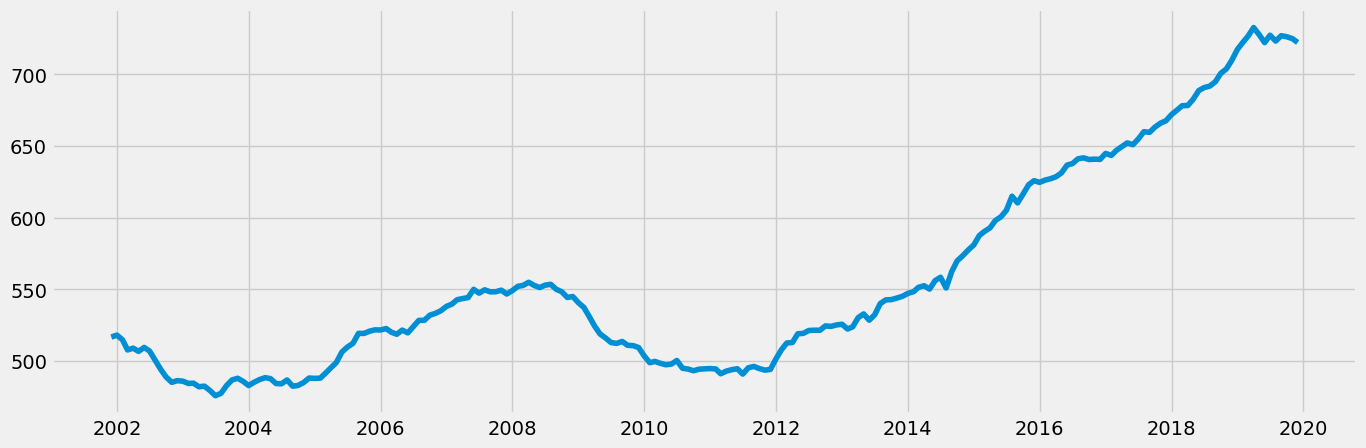

In [41]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data2_sub)

This is the initial chart, based on the Moving Average. Definitely smoother than before! 

In [42]:
# Check for missing values

data2_sub.isnull().sum() # no null values

MA_value    0
dtype: int64

In [43]:
# Check for duplicates

dups2 = data2_sub.duplicated()
dups2.sum()



14

### 3B. Time series analysis: decomposition

In [44]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(data2_sub, model='additive')

In [45]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

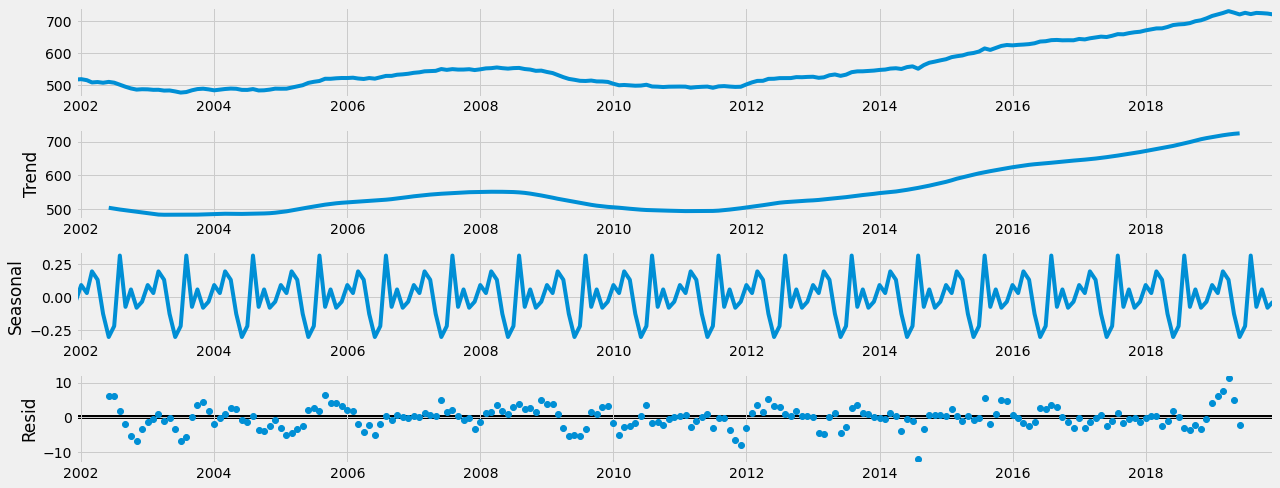

In [46]:
# Plot the separate components

decomposition2.plot()
plt.show()

### 3C. Testing for stationarity

In [47]:
# Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2_sub['MA_value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.555758
p-value                          0.880669
Number of Lags Used             14.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64





| Test Statistic        | -0.555758   |
|-----------------------|-------------|
|  Critical Value (5%)  | -2.875957   |


Comparing the Test Statistic and Critical value (5%) shows that the Test Statistics, -0.555758,  is much bigger  than the Critical Value (5%), -2.875957. This means we cannot reject the null hypothesis and that the data is **non-stationary**! 


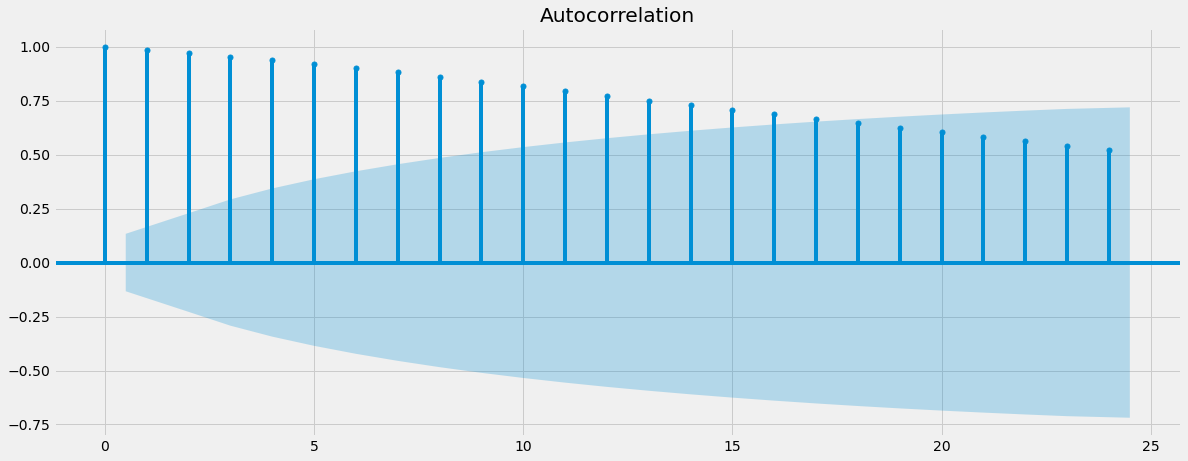

In [48]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data2_sub)
plt.show()

There are far too many lags since there are more lines reaching outside the blue edge of the confidence interval. This supports the results of the Dickey-Fuller Stationarity test.

### 3D. Stationarizing the Federal Reserve Economic Data

In [49]:
data_diff = data2_sub - data2_sub.shift(1) 

In [50]:
data_diff.dropna(inplace = True) 


In [51]:
data_diff.head()

,MA_value
datetime,
2002-01-01,1.333333
2002-02-01,-3.250000
2002-03-01,-7.083333
2002-04-01,1.250000
2002-05-01,-2.250000


In [52]:
data_diff.columns

Index(['MA_value'], dtype='object')

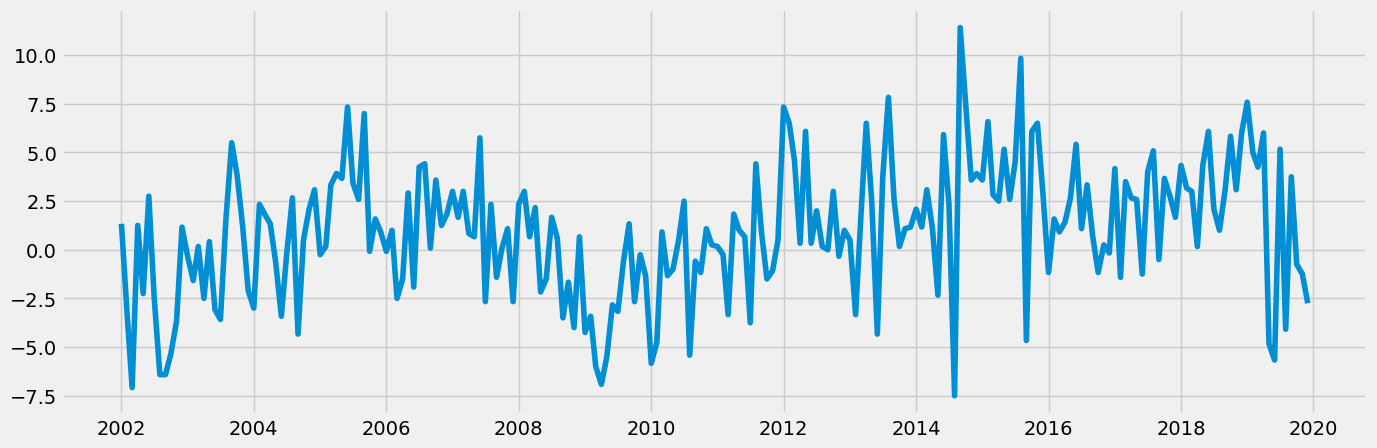

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.511435
p-value                          0.112717
Number of Lags Used             13.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


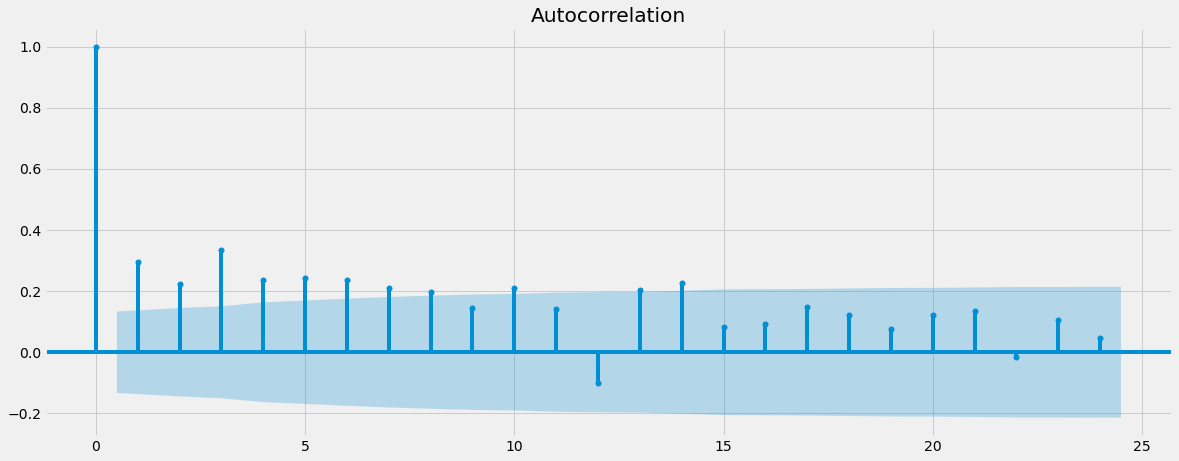

In [55]:
plot_acf(data_diff)
plt.show()




| Test Statistic        |  -2.511435   |
|-----------------------|--------------|
|  Critical Value (5%)  | -2.875957    |


The Test Statistic is still slightly bigger than the Critical Value. 

I think the stationarity looks ok at this point , but it's probably a bit weak still so I am going to conduct nother round of differencing to stationarize it further and reduce the remaining:

***Stationarizing the data one more time:***

In [56]:
data_diff2 = data_diff - data_diff.shift(1) 

In [57]:
data_diff2.dropna(inplace = True) 


In [58]:
data_diff2.head()

,MA_value
datetime,
2002-02-01,-4.583333
2002-03-01,-3.833333
2002-04-01,8.333333
2002-05-01,-3.500000
2002-06-01,5.000000


In [59]:
data_diff.columns

Index(['MA_value'], dtype='object')

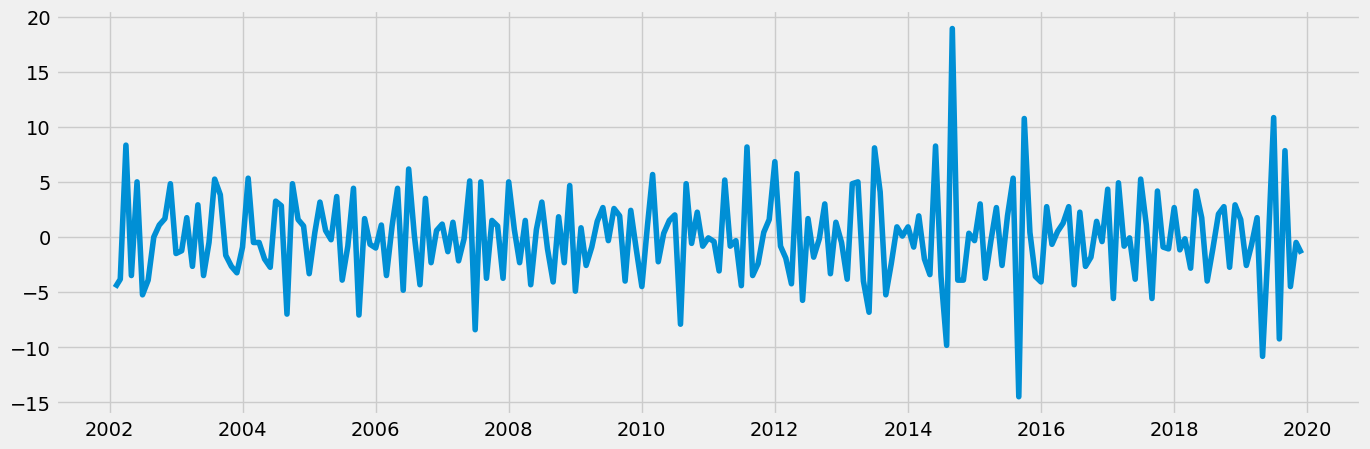

In [60]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [61]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.764336e+00
p-value                        5.577781e-07
Number of Lags Used            1.200000e+01
Number of Observations Used    2.020000e+02
Critical Value (1%)           -3.463144e+00
Critical Value (5%)           -2.875957e+00
Critical Value (10%)          -2.574455e+00
dtype: float64


This is perfect! 




| Test Statistic        |  -5.764336e+00   |
|-----------------------|------------------|
|  Critical Value (5%)  | -2.875957e+00    |


Comparing the Test Statistic and Critical value (5%) shows that the Test Statistics, -5.764336e+00,  is finally smaller than the Critical Value,-2.875957e+00, which means that we can reject the null hypothesis and that the data is now **stationary**! 


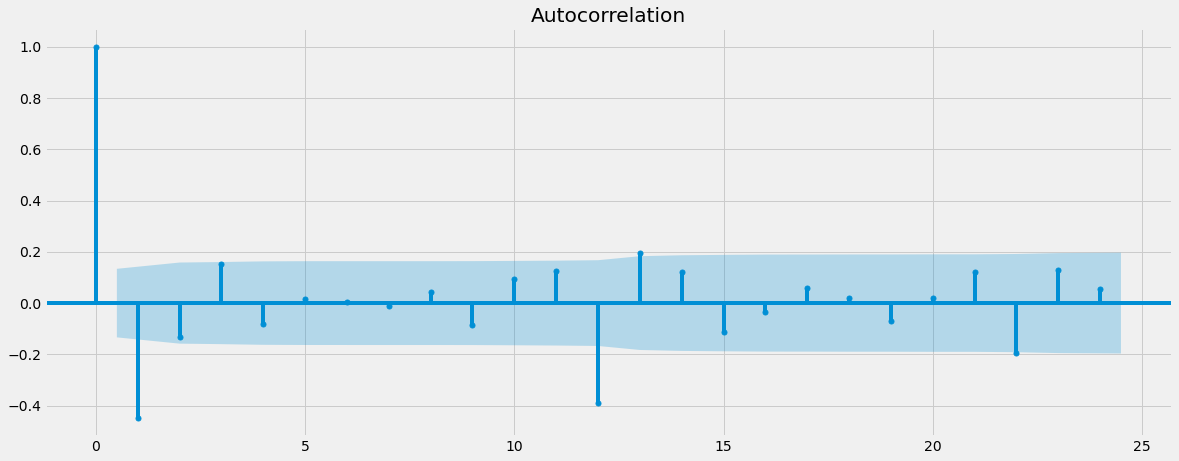

In [62]:
plot_acf(data_diff2)
plt.show()

Much better! 

Now both datasets in this notebook are stationary! 